In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
connection = sqlite3.connect('data/checking-logs.sqlite')

In [3]:
df_checker = pd.read_sql_query("SELECT * FROM checker WHERE uid NOT LIKE 'admin_%'", connection)
df_checker['timestamp'] = pd.to_datetime(df_checker['timestamp'])

In [4]:
df_checker['weekday'] = df_checker['timestamp'].dt.day_name()
df_checker['hour'] = df_checker['timestamp'].dt.hour

In [5]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_checker['weekday'] = pd.Categorical(df_checker['weekday'], categories=weekday_order, ordered=True)

In [6]:
heatmap_weekday = (
    df_checker.groupby(['weekday', 'uid'])
    .size()
    .unstack(fill_value=0)
)
heatmap_hour = (
    df_checker.groupby(['hour', 'uid'])
    .size()
    .unstack(fill_value=0)
)

C:\Users\olegv\AppData\Local\Temp\ipykernel_8780\2717713642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_checker.groupby(['weekday', 'uid'])


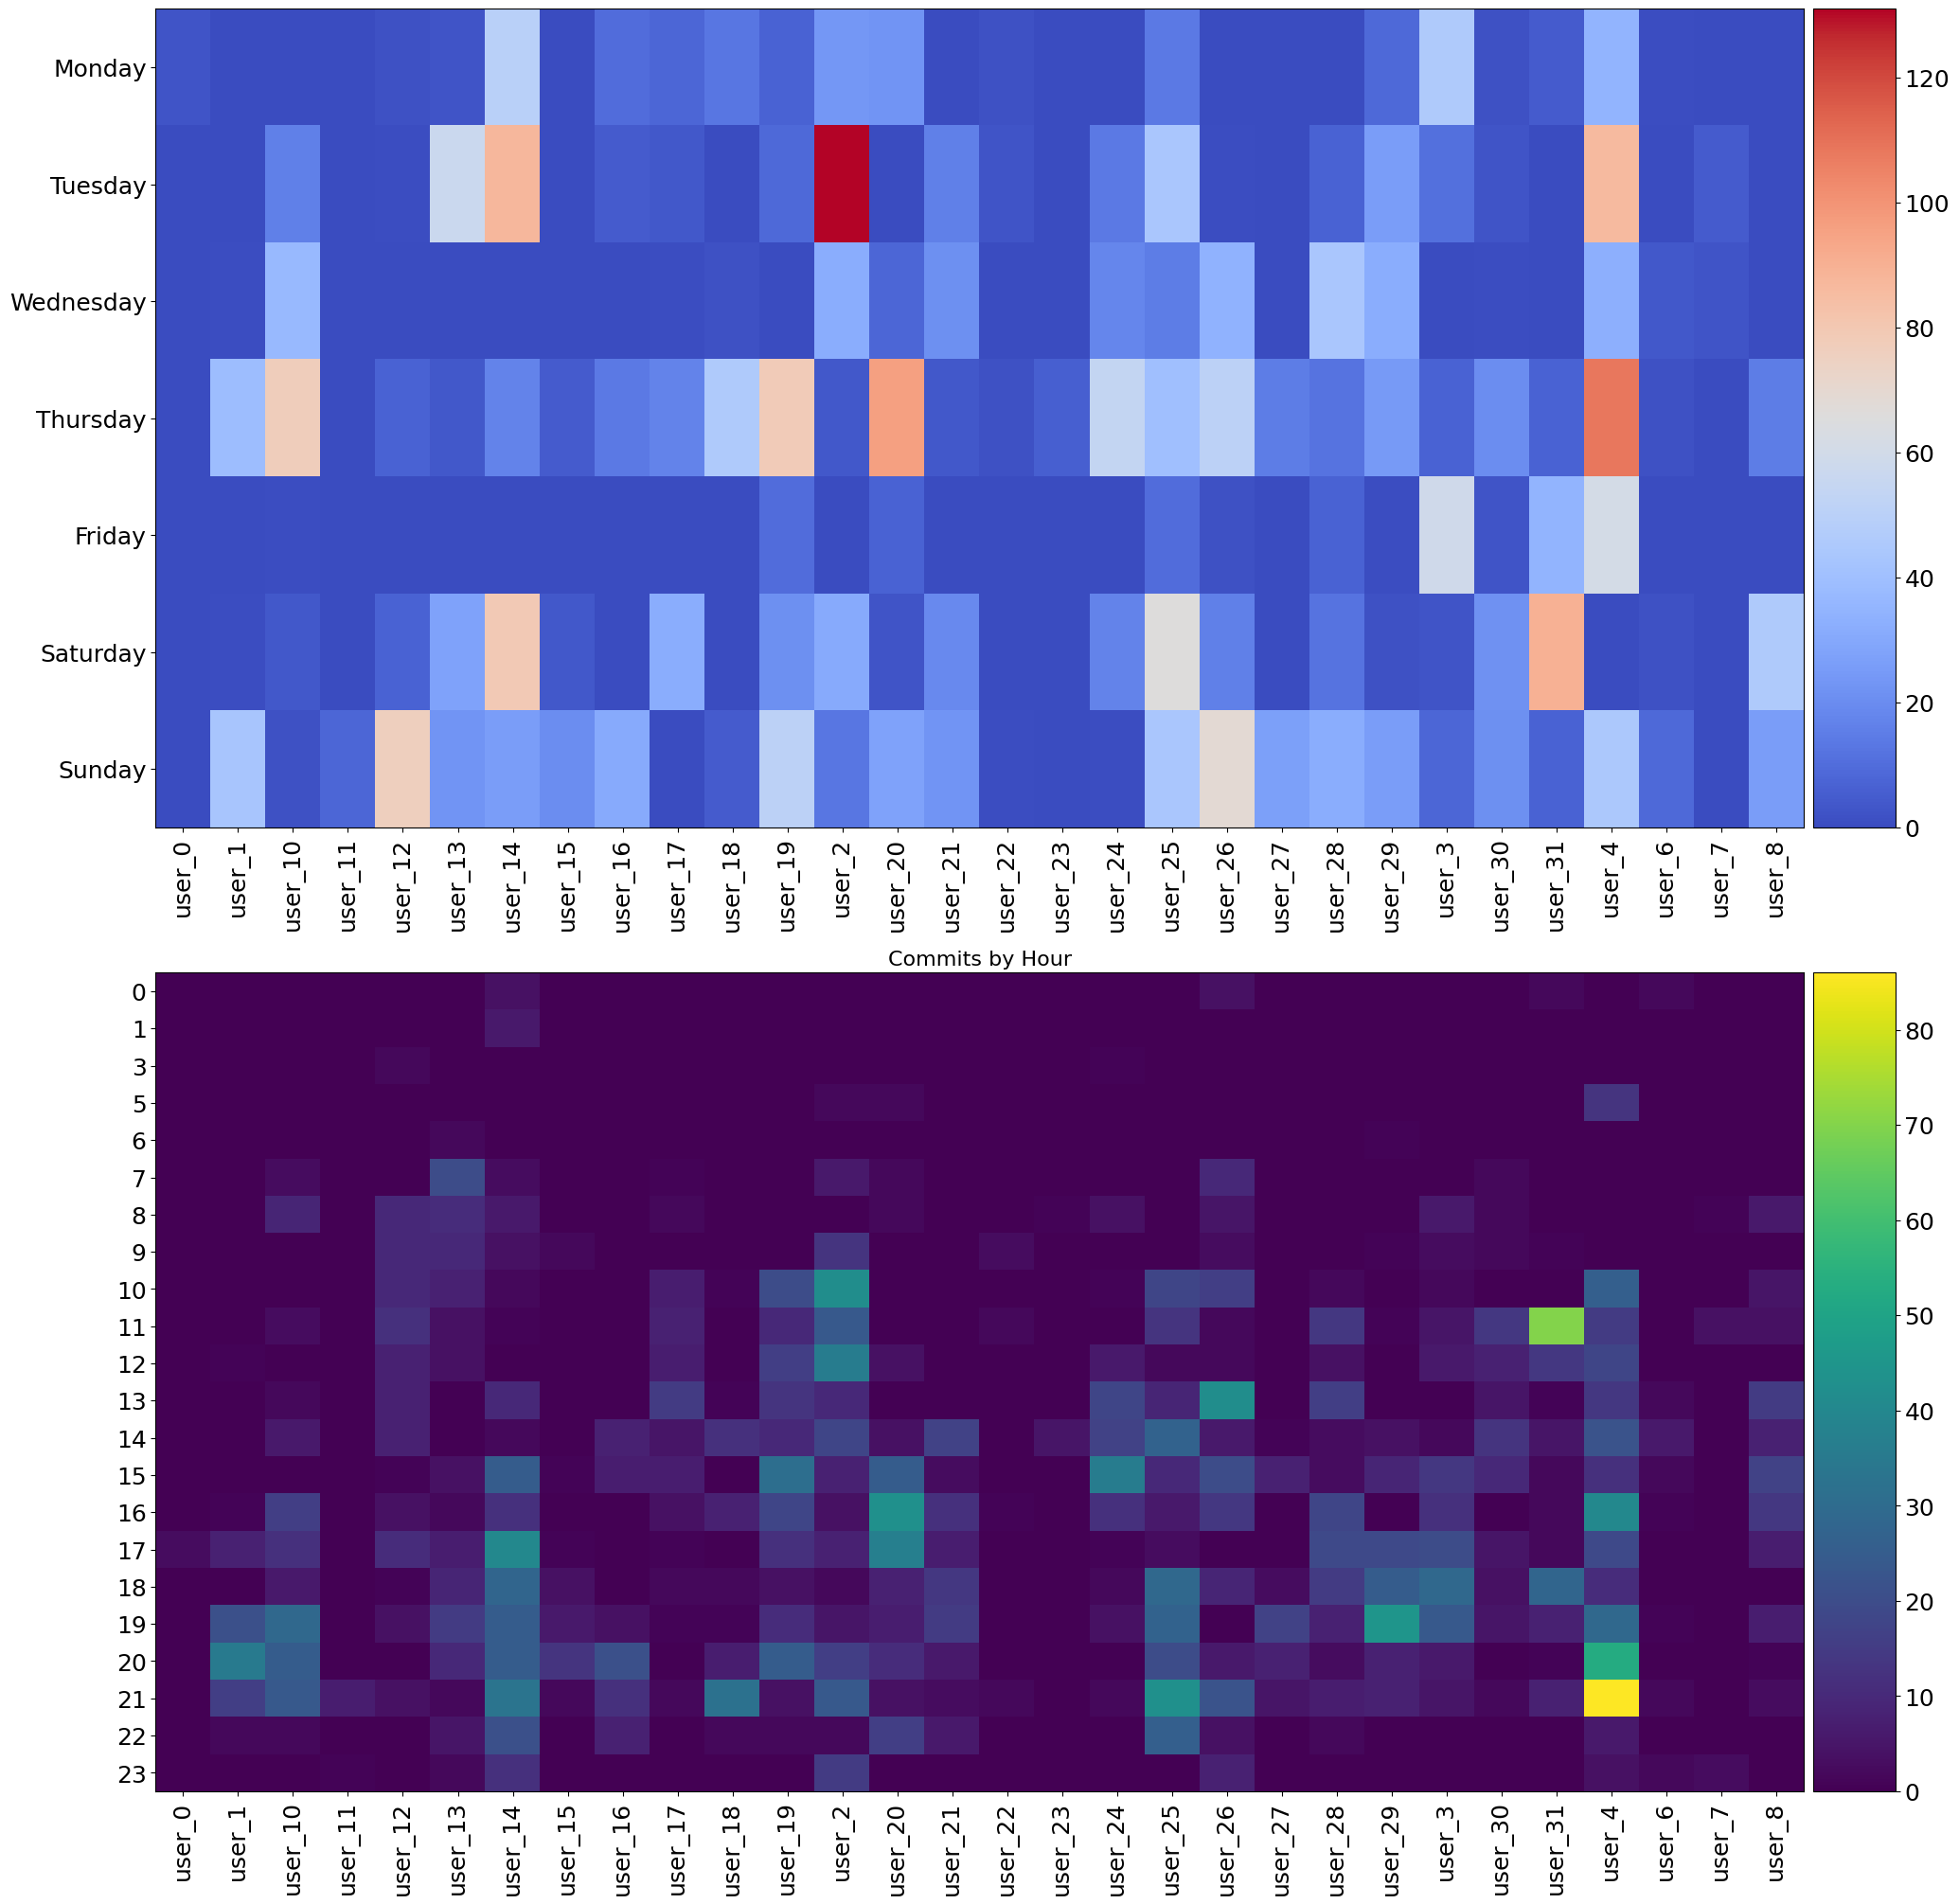

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20), constrained_layout=True)

ax1 = axes[0]
im1 = ax1.imshow(heatmap_weekday, cmap='coolwarm', aspect='auto')
ax1.set_xticks(range(len(heatmap_weekday.columns)))
ax1.set_xticklabels(heatmap_weekday.columns, rotation=90, fontsize=18)
ax1.set_yticks(range(len(heatmap_weekday.index)))
ax1.set_yticklabels(heatmap_weekday.index, fontsize=18)

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
cbar1 = fig.colorbar(im1, cax=cax1, orientation='vertical')
cbar1.ax.tick_params(labelsize=18)

ax2 = axes[1]
im2 = ax2.imshow(heatmap_hour, cmap='viridis', aspect='auto')
ax2.set_xticks(range(len(heatmap_hour.columns)))
ax2.set_xticklabels(heatmap_hour.columns, rotation=90, fontsize=18)
ax2.set_yticks(range(len(heatmap_hour.index)))
ax2.set_yticklabels(heatmap_hour.index, fontsize=18)
ax2.set_title('Commits by Hour', fontsize=16)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.1)
cbar2 = fig.colorbar(im2, cax=cax2, orientation='vertical')
cbar2.ax.tick_params(labelsize=18)

plt.show()

In [8]:
connection.close()

У какого пользователя больше всего коммитов во вт?

In [9]:
most_commits_tue = heatmap_weekday.loc['Tuesday'].idxmax()
print(f'Ответ: {most_commits_tue}')

Ответ: user_2


Какой пользователь имеет больше всего коммитов в Чт?

In [10]:
most_commits_thu = heatmap_weekday.loc['Thursday'].idxmax()
print(f'Ответ: {most_commits_thu}')

Ответ: user_4


В какой будний день пользователи не любят делать много коммитов?

In [11]:
weekday_least_commits = heatmap_weekday.sum(axis=1).idxmin()
print(f'Ответ: {weekday_least_commits}')

Ответ: Friday


Какой пользователь в какой час сделал наибольшее количество коммитов?

In [12]:
(hour_max_commits_hour, user_max_commits_hour) = heatmap_hour.stack().idxmax()
print(f'Ответ: {user_max_commits_hour}, {hour_max_commits_hour}')

Ответ: user_4, 21
